# 📊 Term Deposit Subscription Prediction – Bank Marketing Dataset

**Objective**: Predict whether a customer will subscribe to a term deposit using classification models.

**Dataset**: Bank Marketing Dataset (2015–2017)

**Tools**: Python, Pandas, Scikit-learn, Matplotlib, Seaborn

**Target Variable**: `y` (yes/no)


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
# Step 2: Load the dataset
df = pd.read_csv('bank (1).csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


## 🔍 Exploratory Data Analysis (EDA)

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(4521, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


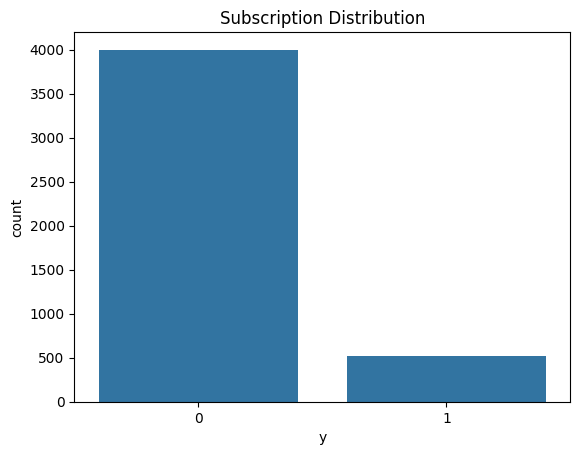

In [ ]:
# Target variable distribution
sns.countplot(x='y', data=df)
plt.title('Subscription Distribution')
plt.show()

## 🧹 Data Cleaning & Preprocessing

In [ ]:
# Encode categorical variables
df_encoded = pd.get_dummies(df.drop(columns=['duration']), drop_first=True)
le = LabelEncoder()
df_encoded['y'] = le.fit_transform(df['y'])
df_encoded.head()

,age,balance,day,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,1,-1,0,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,33,4789,11,1,339,4,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,35,1350,16,1,330,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,4,-1,0,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
4,59,0,5,1,-1,0,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True


## 🧠 Model Building & Evaluation

## 🔍Data Encoding

In [ ]:
# Drop duration (data leakage) and encode categorical features
df_encoded = pd.get_dummies(df.drop(columns=['duration']), drop_first=True)
le = LabelEncoder()
df_encoded['y'] = le.fit_transform(df['y'])

## 📊 Train/Test Split

In [ ]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       801
           1       0.22      0.62      0.33       104

    accuracy                           0.71       905
   macro avg       0.58      0.67      0.57       905
weighted avg       0.85      0.71      0.76       905



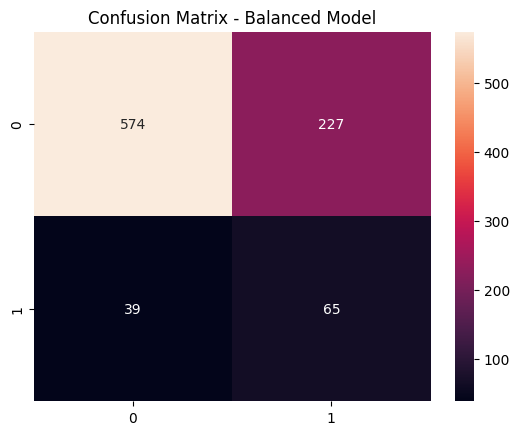

In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with class weights and higher max_iter
from sklearn.linear_model import LogisticRegression
balanced_model = LogisticRegression(
    class_weight='balanced',
    max_iter=2000,
    solver='liblinear'
)

# Fit model
#balanced_model.fit(X_scaled, y_train)
balanced_model.fit(X_train_scaled, y_train)
y_balanced_pred = balanced_model.predict(scaler.transform(X_test))

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_balanced_pred))
sns.heatmap(confusion_matrix(y_test, y_balanced_pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Balanced Model')
plt.show()

### Model Findings

The logistic regression model achieved an accuracy of 71%, but more importantly:

*   Precision (Subscribed): 22%
*   Recall (Subscribed): 62%

This tells us that:

*   While many predicted "yes" may be false positives, we are correctly identifying over 60% of those who would actually subscribe
*   This is useful in a marketing context, where recall is more important — better to reach out to most potential subscribers, even if some don’t convert.

## 📈 ROC Curve

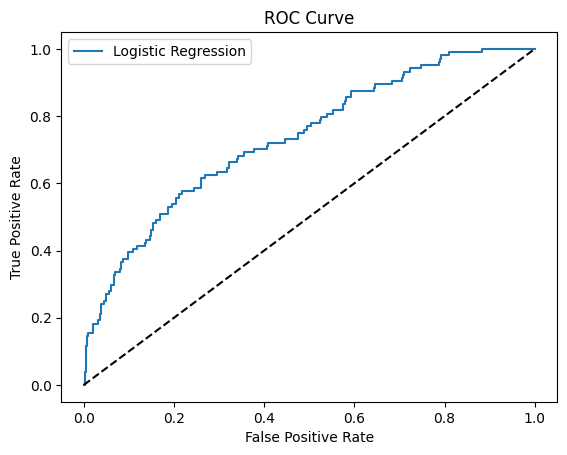

In [ ]:
y_probs = balanced_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()